In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].unique()

array([0, 1])

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud=df[df.Class==1]
not_fraud=df[df.Class==0]

In [10]:
fraud.shape, not_fraud.shape

((492, 31), (284315, 31))

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# By Oversampling

In [12]:
for i in range(9):
    fraud=pd.concat([fraud,fraud], axis=0)

In [13]:
fraud.shape

(251904, 31)

In [14]:
fraud.shape, not_fraud.shape

((251904, 31), (284315, 31))

In [15]:
data=pd.concat([fraud, not_fraud],axis=0)

In [16]:
data.Class.value_counts()

0    284315
1    251904
Name: Class, dtype: int64

In [17]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=data.drop(columns=['Class'], axis=1)
Y=data['Class']

In [20]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=42)

In [21]:
x_train.shape, x_test.shape

((375353, 30), (160866, 30))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [23]:
from sklearn.metrics import accuracy_score, f1_score

In [24]:
def model_call(model_lst, x_train, y_train, x_test, y_test, name):
    dct={}
    
    for i in range(len(mod_lst)):
        mod=model_lst[i].fit(x_train,y_train)
        
        y_train_pred=mod.predict(x_train)
        acc_train=round(accuracy_score(y_train_pred,y_train),4)
        f1_train=round(f1_score(y_train_pred, y_train),4)
        
        y_test_pred=mod.predict(x_test)
        acc_test=round(accuracy_score(y_test_pred, y_test),4)
        f1_test=round(f1_score(y_test_pred, y_test),4)
        
        dct[name[i]]=[acc_train, f1_train, acc_test, f1_test]
    return dct

In [25]:
mod_lst=[LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier()]
mod_name=['Logistic Regression','Random Forest','Gradient Boosting','Hist Gradient Boosting','XGBoost','LGBM']

In [26]:
dct=model_call(mod_lst, x_train, y_train, x_test, y_test, mod_name)

[LightGBM] [Info] Number of positive: 176263, number of negative: 199090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 375353, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469593 -> initscore=-0.121780
[LightGBM] [Info] Start training from score -0.121780


In [27]:
dct

{'Logistic Regression': [0.9396, 0.9338, 0.9399, 0.9344],
 'Random Forest': [1.0, 1.0, 0.9999, 0.9999],
 'Gradient Boosting': [0.9926, 0.9921, 0.9926, 0.9921],
 'Hist Gradient Boosting': [0.9999, 0.9999, 0.9998, 0.9998],
 'XGBoost': [1.0, 1.0, 0.9999, 0.9999],
 'LGBM': [0.9999, 0.9999, 0.9998, 0.9998]}

In [28]:
df1=pd.DataFrame(dct)
df1=df1.T

# By UnderSampling

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
fraud_n=df[df['Class']==1]
not_fraud_n=df[df['Class']==0]

In [33]:
fraud_n.shape, not_fraud_n.shape

((492, 31), (284315, 31))

In [34]:
not_fraud_n=not_fraud_n.sample(n=492)
not_fraud_n.shape

(492, 31)

In [36]:
data_n=pd.concat([fraud_n, not_fraud_n])
data_n.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92473.038618,0.006312,0.014269,0.092307,0.052158,-0.055220,0.022946,-0.022158,0.116531,0.045590,...,-0.004070,-0.013140,0.000654,0.022901,0.045924,0.037136,-0.006593,0.007094,-0.000212,83.970122
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [39]:
X=data_n.drop(columns=['Class'], axis=1)
Y=data_n['Class']

In [41]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=42)

In [50]:
mod_name=['Logistic Regression N','Random Forest N','Gradient Boosting N','Hist Gradient Boosting N','XGBoost N','LGBM N']

In [51]:
dct2=model_call(mod_lst, x_train, y_train, x_test, y_test, mod_name)

/home/ettexham/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 342, number of negative: 346
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6888
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497093 -> initscore=-0.011628
[LightGBM] [Info] Start training from score -0.011628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [52]:
df2=pd.DataFrame(dct2)
df2=df2.T

In [55]:
view_data=pd.concat([df1,df2])
view_data.columns=['Training Accuracy','Training F1', 'Testing Accuracy', 'Testing F1']

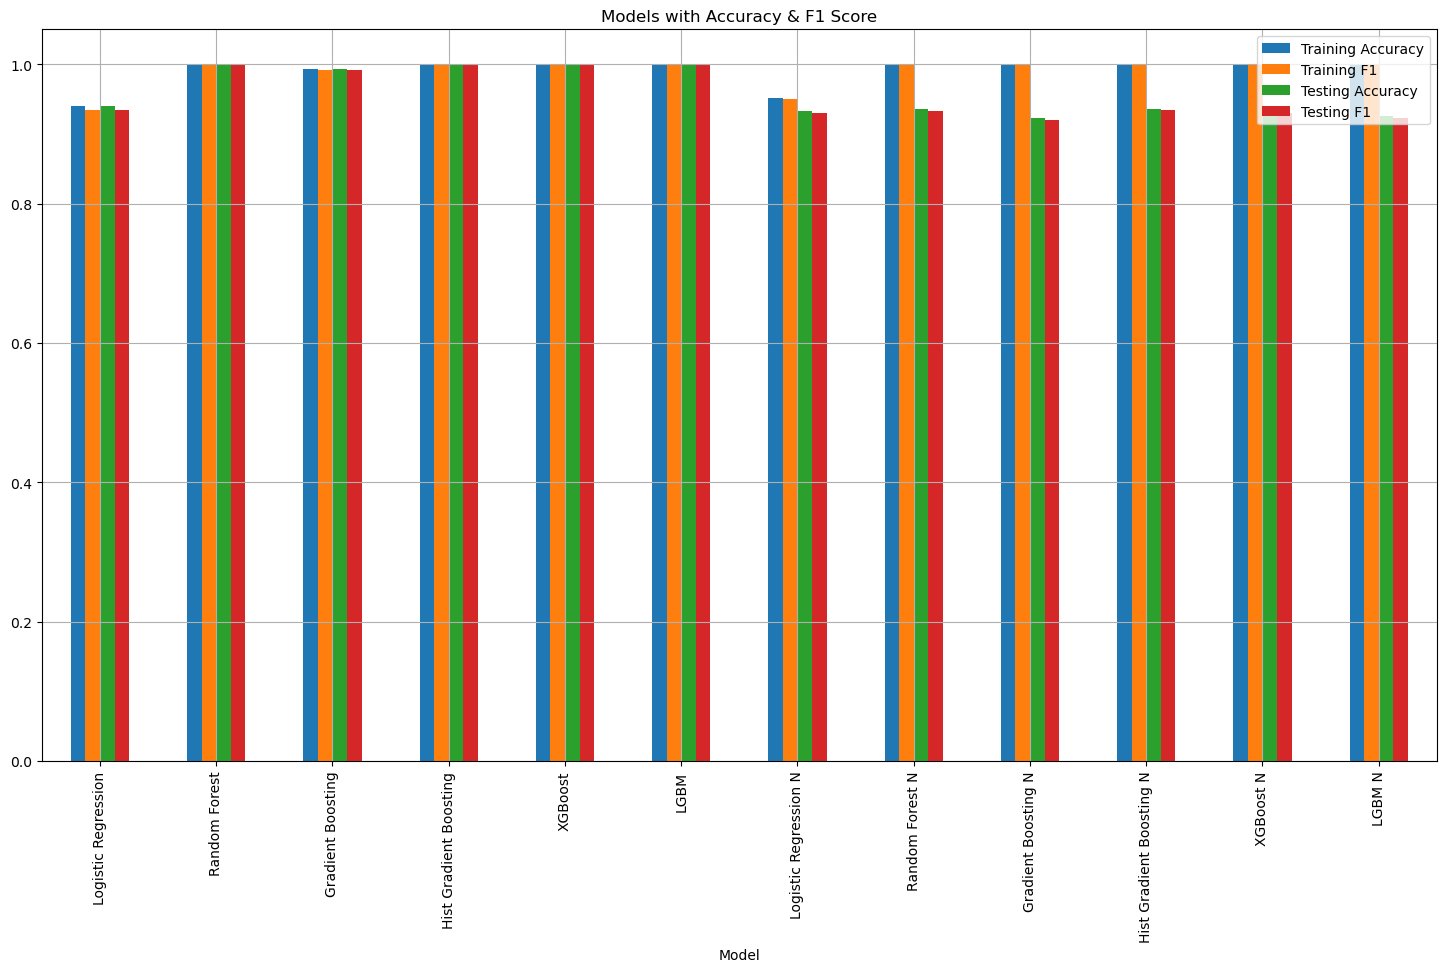

In [59]:
plt.rcParams["figure.figsize"] = [18.00, 9.50]
view_data.plot(kind='bar')
plt.title('Models with Accuracy & F1 Score')
plt.xlabel('Model')
plt.grid()